In [3]:
import pandas as pd
import numpy as np
import pylab as plt

In [4]:
#Days to expiry (approx trading days in one year)
N_Days = 252
#Number of simulations
N_Runs = 100000

Spot_Price = 100
strike = 100

#annualised implied volatility
volatility = 0.15


In [5]:
#Creating the Return Paths 
#Generate a large number of paths that the price of a stock could take from an initial starting price
#To do this we create an array of 100,000 x 252 normally distributed random numbers, representing daily percentage returns of our underlying security.
#We generate normally distributed random numbers with a standard deviation of 1 and therefore we need to scale them with our implied daily volatility.
#Volatility roughly increases with the square root of time, so in order to scale our daily returns we divide our annualised volatility by the square root of 252, the number of trading days in a year.

np.random.seed(25)
rets = np.random.randn(N_Runs,N_Days)*volatility/np.sqrt(252)
rets.shape


(100000, 252)

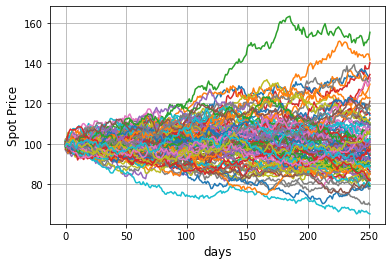

In [6]:
#The Price Cone
#Visualise the price paths as the cumulative product of our returns

traces = np.cumprod(1+rets,1)*Spot_Price

for i in traces[:100,:]:
    plt.plot(i)
plt.grid()
plt.xlabel('days',fontsize=12)
plt.ylabel('Spot Price', fontsize=12)
plt.show()

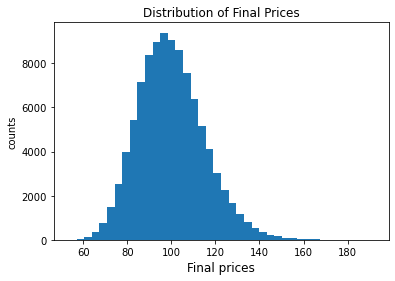

In [7]:
#Distribution of final prices at expiry
# Observe the asymmetry in the price distribution

plt.hist(traces[:,-1],bins=40);
plt.title('Distribution of Final Prices')
plt.xlabel('Final prices',fontsize=12)
plt.ylabel('counts')
plt.show()

- This distribution is very important in determining the price of our option  
- To price our vanilla call option, we calculate the differences between the final prices and our strike and set all prices that end up below the strike to zero.  
- Prices below the strike are worthless at expiry  
- Our options price is now simply the average of all the final price differences  

In [8]:
call = np.mean((traces[:,-1] - strike)*((traces[:,-1] - strike)>0))
call

5.959986363736703

In [9]:
#For vanilla put option 
put = np.mean((strike - traces[:,-1])*(((traces[:,-1] - strike<0))))
put

5.946723440077413

In [10]:
#Adding risk free rate 

def get_price_w_rf(right,T,S,X,v,rf,N=100000):
    D = np.exp(-rf*(T/252))
    prices = np.cumprod(1+(np.random.randn(T,N)*v/np.sqrt(252)),axis=0)*S
    if right == 'c':
        return np.sum((prices[-1,:]-X*D)[prices[-1,:]>X*D])/prices.shape[1]
    else:
        return -np.sum((prices[-1,:]-X*D)[prices[-1,:]<X*D])/prices.shape[1]

In [15]:
get_price_w_rf('c',126,100,100,0.15,0.02)

4.737739750872537